In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_all = pd.read_csv("AB_NYC_2019.csv")
df_all.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df_all.shape

(48895, 16)

In [7]:
df_all.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
for i in list(df_all.select_dtypes('object').columns):
    print (i, " ", df_all[i].nunique())

name   47905
host_name   11452
neighbourhood_group   5
neighbourhood   221
room_type   3
last_review   1764


In [9]:
df_all.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Replacing null values in the column reviews_per_month with 0 in the dataset:

In [11]:
df_all['reviews_per_month'].fillna(0,inplace = True)

In [12]:
df_all.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Unique neighbourhood:

In [13]:
df_all.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

# Showing number of listings based on neighbourhood:

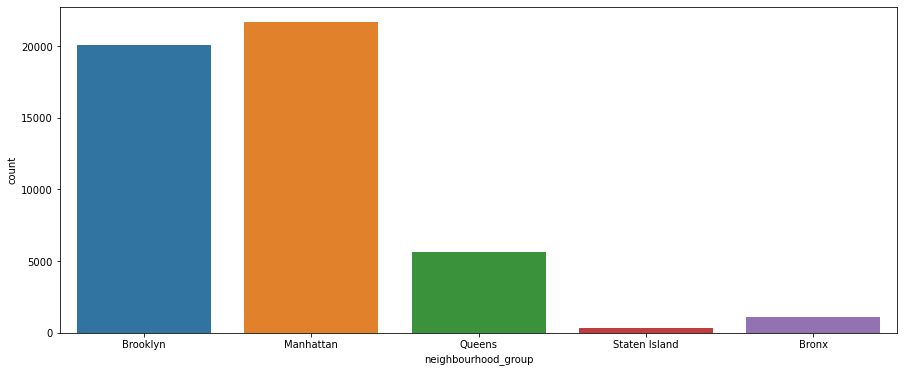

In [14]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.neighbourhood_group)
plt.show()

# Map of Neighbourhood group:

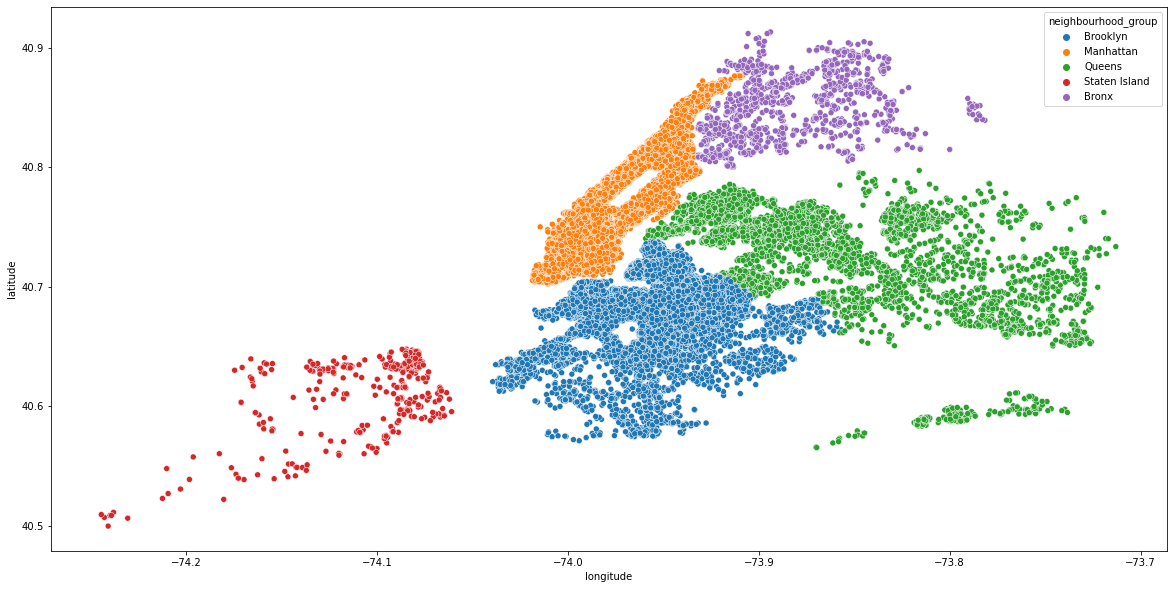

In [15]:
plt.figure(figsize=(20,10))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.title
plt.ioff()

# Roome type:

Text(0.5, 1.0, 'Room Type')

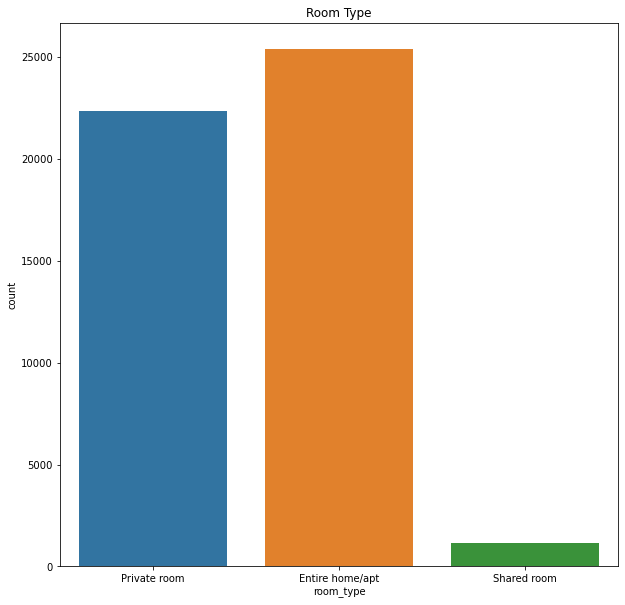

In [16]:
sns.countplot(df['room_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Type')

storing all the diffrent neighbourhood groups to diffrent data frames:

In [17]:
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

# top 10 areas in brooklyn with most booking:

Text(0.5, 0, 'Number of rooms')

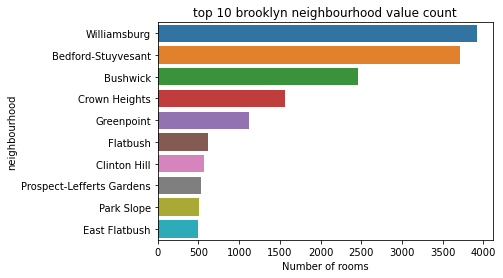

In [19]:
sns.countplot(y="neighbourhood", data=brooklyn_group_df,
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')

plt.xlabel('Number of rooms')

# top 10 areas in manhattan with most booking:

Text(0.5, 0, 'Number of rooms')

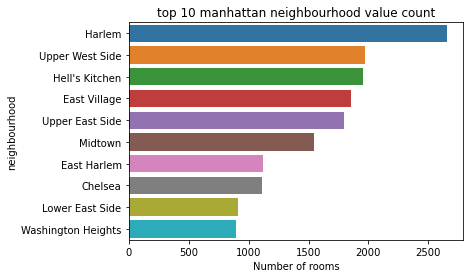

In [20]:
sns.countplot(y="neighbourhood", data=manhattan_group_df,
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')

plt.xlabel('Number of rooms')

# top 10 areas in Queens with most booking:

Text(0.5, 0, 'Number of rooms')

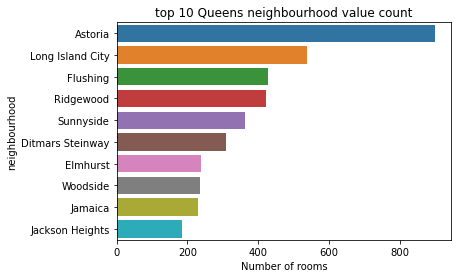

In [21]:
sns.countplot(y="neighbourhood", data=Queens_group_df,
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

plt.xlabel('Number of rooms')

# top 10 areas in Staten_Island with most booking:

Text(0.5, 0, 'Number of rooms')

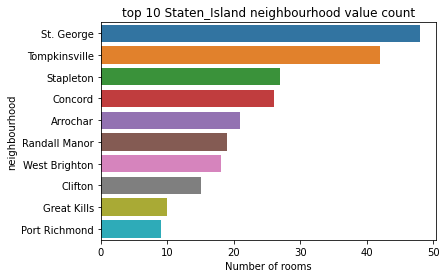

In [22]:
sns.countplot(y="neighbourhood", data=Staten_Island_group_df,
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

plt.xlabel('Number of rooms')              

# top 10 areas in Bronx with most booking:

Text(0.5, 0, 'Number of rooms')

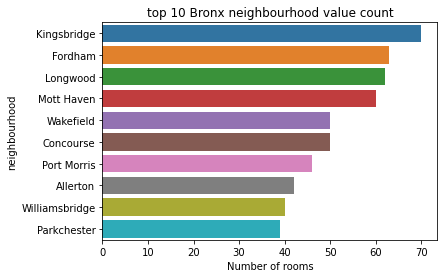

In [23]:
sns.countplot(y="neighbourhood", data=Bronx_group_df,
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')


plt.xlabel('Number of rooms')  

# Number of reviews and its affect to price:

<AxesSubplot:title={'center':'reviews based on Price'}, xlabel='price'>

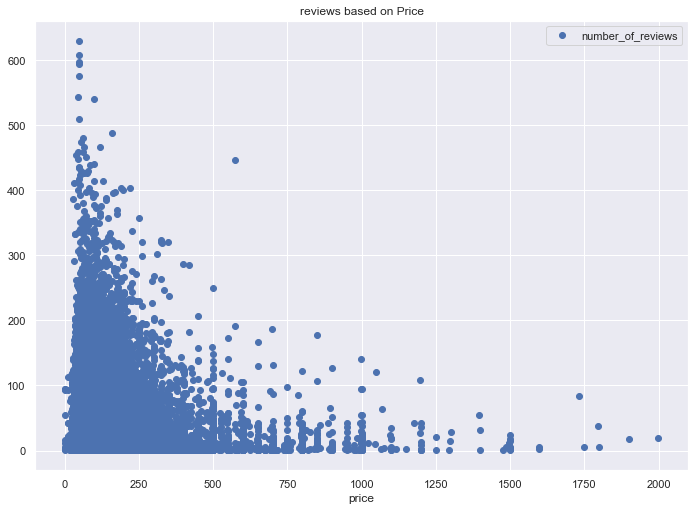

In [161]:
price_review = df[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['number_of_reviews']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'number_of_reviews', 
                  style = 'o',
                  title = 'reviews based on Price')

1) number of reviews on price range between 0 & 250 is high which mean most people prefer renting rooms which have a price below 250

2) number of reviews decrease as you increase the price



# Most busiest hosts:

In [159]:
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
av_365 = df.loc[~((df['availability_365'] <= 200) | (df['calculated_host_listings_count']<=50)| (df['number_of_reviews'] == 0))].reset_index()
av_365=av_365.groupby(["host_id",'host_name','calculated_host_listings_count'],as_index=False)['number_of_reviews','availability_365'].mean()
av_365.sort_values(['calculated_host_listings_count'],ascending=False,inplace=True)
av_365

,host_id,host_name,calculated_host_listings_count,number_of_reviews,availability_365
10,219517861,Sonder (NYC),327,6.262295,311.267760
7,107434423,Blueground,232,1.041667,295.041667
5,30283594,Kara,121,1.472222,345.555556
8,137358866,Kazuya,103,1.789474,241.473684
2,12243051,Sonder,96,1.481481,306.000000
3,16098958,Jeremy & Laura,96,2.263158,309.912281
6,61391963,Corporate Housing,91,4.980392,313.039216
4,22541573,Ken,87,1.388889,337.111111
9,200380610,Pranjal,65,1.000000,342.000000
0,1475015,Mike,52,3.902439,340.341463


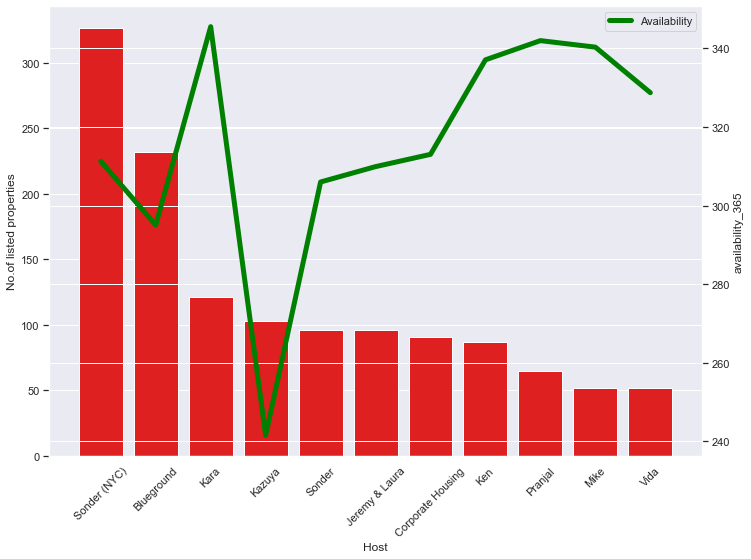

In [160]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_ava = sns.barplot(x="host_name",
                 y="calculated_host_listings_count", 
                 data=av_365,color="red")

ax_ava.set(ylabel="No.of listed properties",
           xlabel="Host")
plt.xticks(rotation=45)

ax2_ava = ax_ava.twinx() # create axis 2 for prrice listing
ax2_ava = sns.lineplot(x='host_name', 
             y='availability_365',
             color='green',
             label='Availability',
             linewidth=5,
             data=av_365)
ax2_ava.legend(ncol=2, 
               loc="upper right")
plt.show()